In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import cv2
import os 
import PIL
import pathlib
import tensorflow as tf 

from sklearn.model_selection import train_test_split
from tensorflow import keras 
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential
# refer link - https://www.tensorflow.org/datasets/catalog/tf_flowers

In [2]:
dataset_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)

228827136/228813984 [==============================] - 33s 0us/step


In [3]:
data_dir

'.\\datasets\\flower_photos'

In [4]:
os.listdir(data_dir)

['daisy', 'dandelion', 'LICENSE.txt', 'roses', 'sunflowers', 'tulips']

In [10]:
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [11]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [12]:
roses = list(data_dir.glob('roses/*.jpg'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

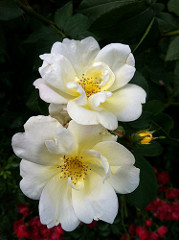

In [13]:
PIL.Image.open(roses[0])

In [14]:
flower_images_dic = {
    'roses' : list(data_dir.glob('roses/*.jpg')),
    'daisy' : list(data_dir.glob('daisy/*.jpg')),
    'dandelion' : list(data_dir.glob('dandelion/*.jpg')),
    'sunflowers' : list(data_dir.glob('sunflowers/*.jpg')),
    'tulips' : list(data_dir.glob('tulips/*.jpg')),
}

In [15]:
flower_labels_dic = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4
}

In [16]:
img = cv2.imread(str(flower_images_dic['roses'][0]))

In [17]:
X, y = [], []
for flower_name, images in flower_images_dic.items():
  for image in images:
    image = str(image)
    img = cv2.imread(image)
    resized_img = cv2.resize(img, (180, 180))
    X.append(resized_img)
    y.append(flower_labels_dic[flower_name])

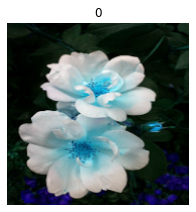

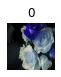

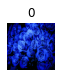

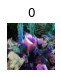

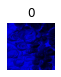

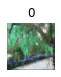

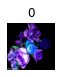

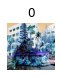

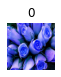

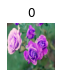

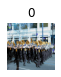

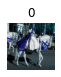

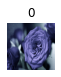

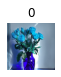

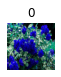

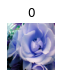

In [18]:
plt.figure(figsize=(15, 20))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.axis('off')
    plt.imshow(X[i])
    plt.title(y[i])
    plt.show()

In [20]:
X = np.array(X)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [21]:
print("X_train Length: ", len(X_train))
print("X_test Length: ", len(X_test))

X_train Length:  2752
X_test Length:  918


In [22]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [23]:
model = Sequential([
                    layers.Conv2D(16, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(32, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Flatten(),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [24]:
history = model.fit(X_train_scaled, y_train, epochs=5, batch_size=64, verbose=1)

Epoch 1/5
43/43 [==============================] - 86s 2s/step - loss: 1.3764 - accuracy: 0.4153
Epoch 2/5
43/43 [==============================] - 79s 2s/step - loss: 1.0214 - accuracy: 0.5945
Epoch 3/5
43/43 [==============================] - 79s 2s/step - loss: 0.8712 - accuracy: 0.6584
Epoch 4/5
43/43 [==============================] - 79s 2s/step - loss: 0.7612 - accuracy: 0.7053
Epoch 5/5
43/43 [==============================] - 93s 2s/step - loss: 0.6573 - accuracy: 0.7627


In [25]:
model.evaluate(X_test_scaled, y_test)
prediction = model.predict(X_test_scaled)
pred = np.argmax(prediction[1])

29/29 [==============================] - 15s 300ms/step - loss: 0.9241 - accuracy: 0.6699


In [26]:
data_augmentation = keras.Sequential([
                                      layers.experimental.preprocessing.RandomFlip('horizontal'),
                                      layers.experimental.preprocessing.RandomRotation(0.1),
                                      layers.experimental.preprocessing.RandomZoom(0.1)
])

In [29]:
model = Sequential([
                    data_augmentation,
                    layers.Conv2D(16, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(32, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Dropout(0.2),
                    layers.Flatten(),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=6, batch_size=64, verbose=1)

Epoch 1/6
43/43 [==============================] - 118s 3s/step - loss: 1.2791 - accuracy: 0.4626
Epoch 2/6
43/43 [==============================] - 109s 3s/step - loss: 1.0580 - accuracy: 0.5719
Epoch 3/6
43/43 [==============================] - 118s 3s/step - loss: 0.9363 - accuracy: 0.6410
Epoch 4/6
43/43 [==============================] - 108s 2s/step - loss: 0.8689 - accuracy: 0.6602
Epoch 5/6
43/43 [==============================] - 109s 3s/step - loss: 0.8317 - accuracy: 0.6839
Epoch 6/6
43/43 [==============================] - 108s 3s/step - loss: 0.7845 - accuracy: 0.6911


In [30]:
model.evaluate(X_test_scaled, y_test)
prediction = model.predict(X_test_scaled)

29/29 [==============================] - 12s 315ms/step - loss: 0.8872 - accuracy: 0.6721
